In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

### Making Plots Actually Look Nice

If one has SciencePlots (https://github.com/garrettj403/SciencePlots) installed has additional options for matplotlib.

In [3]:
plt.style.use(['science', 'notebook', 'grid'])

### Quick plotting

Line Plots

In [4]:
x = np.linspace(0, 15, 30)
y = np.sin(x) + 0.1*np.random.randn(len(x))

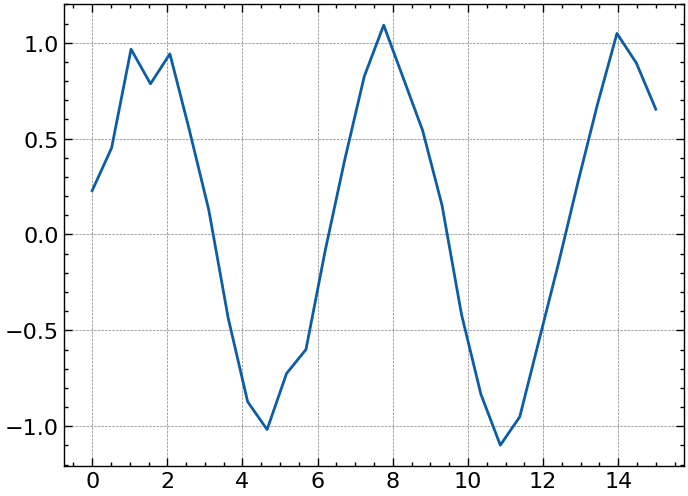

In [5]:
plt.plot(x, y)

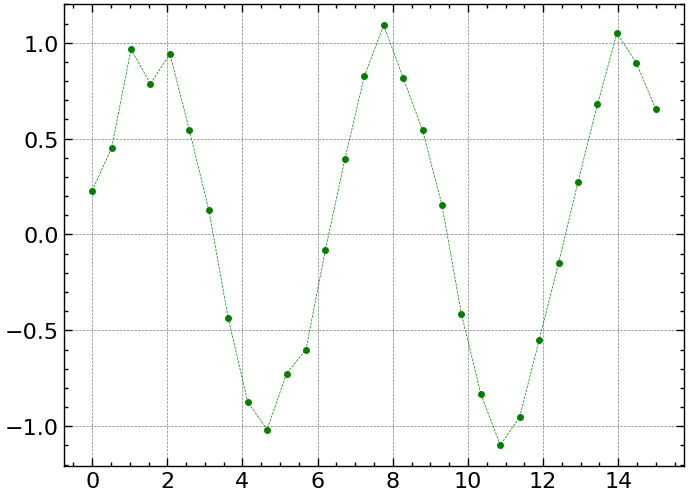

In [6]:
plt.plot(x, y, 'o--', color='green', lw=0.5, ms=4)

Text(0, 0.5, 'Voltage[V]')

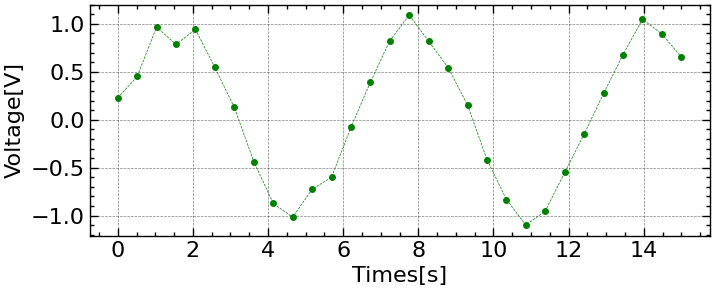

In [7]:
plt.figure(figsize=(8, 3))
plt.plot(x, y, 'o--', color='green', lw=0.5, ms=4)
plt.xlabel('Times[s]')
plt.ylabel('Voltage[V]')

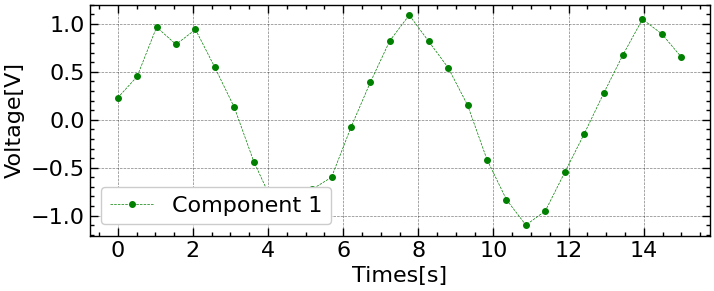

In [8]:
plt.figure(figsize=(8, 3))
plt.plot(x, y, 'o--', color='green', lw=0.5, ms=4, label='Component 1')
plt.xlabel('Times[s]')
plt.ylabel('Voltage[V]')
plt.legend(loc='lower left')

In [9]:
x2 = np.linspace(0, 15, 100)
y2 = np.sin(x2)

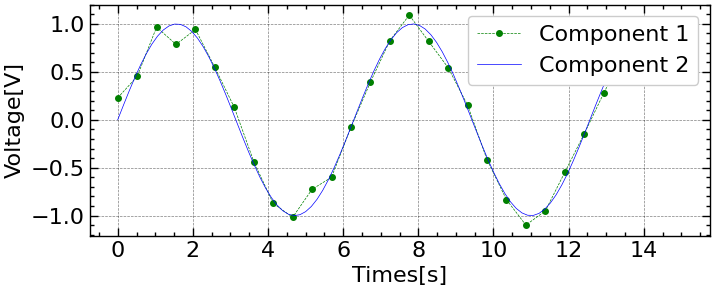

In [10]:
plt.figure(figsize=(8, 3))
plt.plot(x, y, 'o--', color='green', lw=0.5, ms=4, label='Component 1')
plt.plot(x2, y2, '-', color='blue', lw=0.5, ms=4, label='Component 2')
plt.xlabel('Times[s]')
plt.ylabel('Voltage[V]')
plt.legend(loc='upper right')

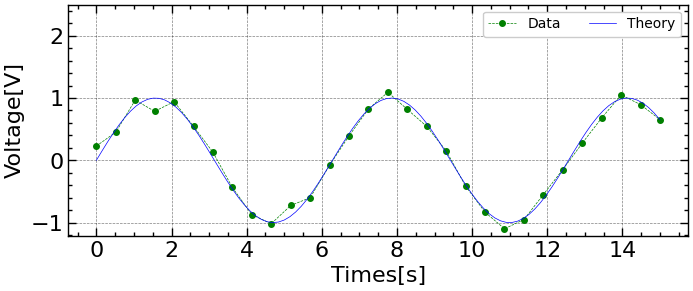

In [11]:
plt.figure(figsize=(8, 3))
plt.plot(x, y, 'o--', color='green', lw=0.5, ms=4, label='Data')
plt.plot(x2, y2, '-', color='blue', lw=0.5, ms=4, label='Theory')
plt.xlabel('Times[s]')
plt.ylabel('Voltage[V]')
plt.ylim(top=2.5)
plt.legend(loc='upper right', fontsize=10, ncol=2)

### Histograms

In [12]:
res = np.random.randn(1000)*0.2 + 0.4

Quick histogram

(array([  6.,  21.,  72., 146., 249., 237., 169.,  71.,  27.,   2.]),
 array([-0.25661482, -0.12576136,  0.00509211,  0.13594557,  0.26679903,
         0.39765249,  0.52850596,  0.65935942,  0.79021288,  0.92106635,
         1.05191981]),
 <BarContainer object of 10 artists>)

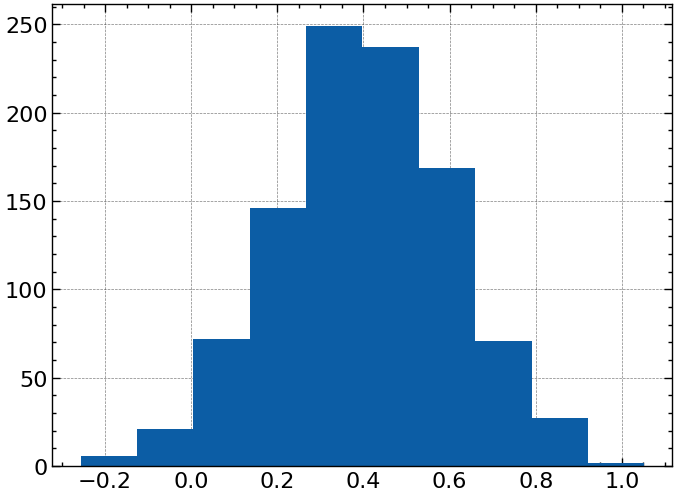

In [13]:
plt.hist(res)

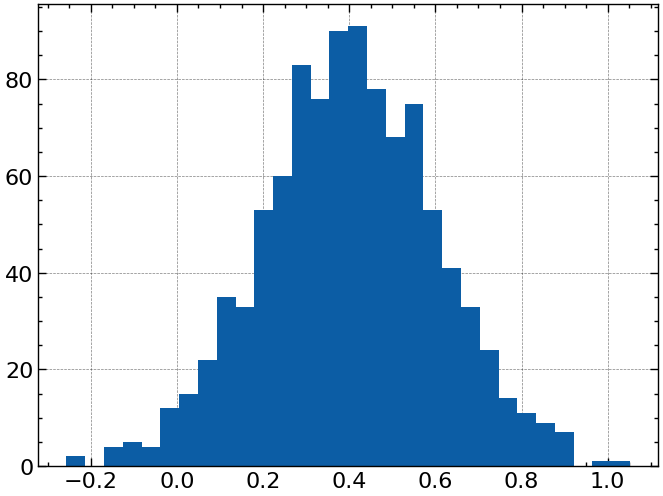

In [14]:
plt.hist(res, bins=30)
plt.show() # removes the text output of the plot

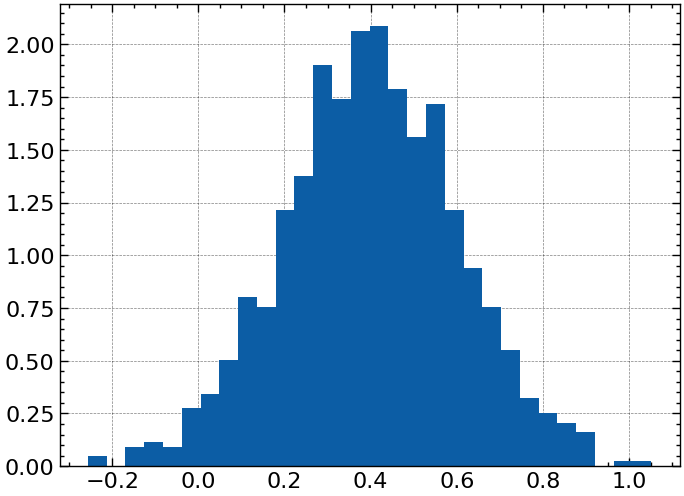

In [15]:
plt.hist(res, bins=30, density=True)
plt.show()

In [16]:
res2 = np.random.randn(1000)*0.2 + 0.4

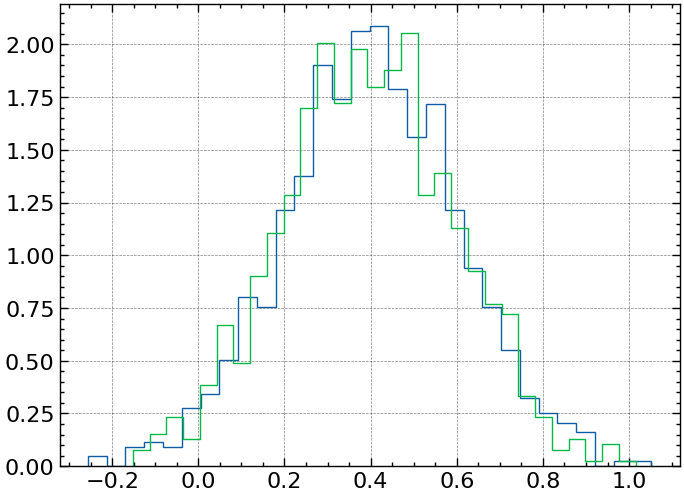

In [17]:
plt.hist(res, bins=30, density=True, histtype='step')
plt.hist(res2, bins=30, density=True, histtype='step')
plt.show()

### A more advanced API
For more complicated plots, such as:
- Multiple subplots on 1 figure,
- Conveniently adding text to plots,
- Creating animations.

One needs to use a slightly more advanced API.

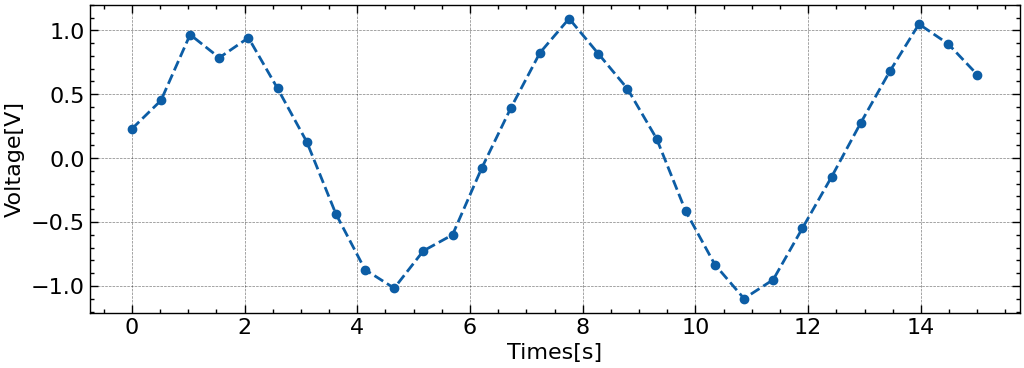

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(x, y, 'o--')
ax.set_xlabel('Times[s]')
ax.set_ylabel('Voltage[V]')
plt.show()

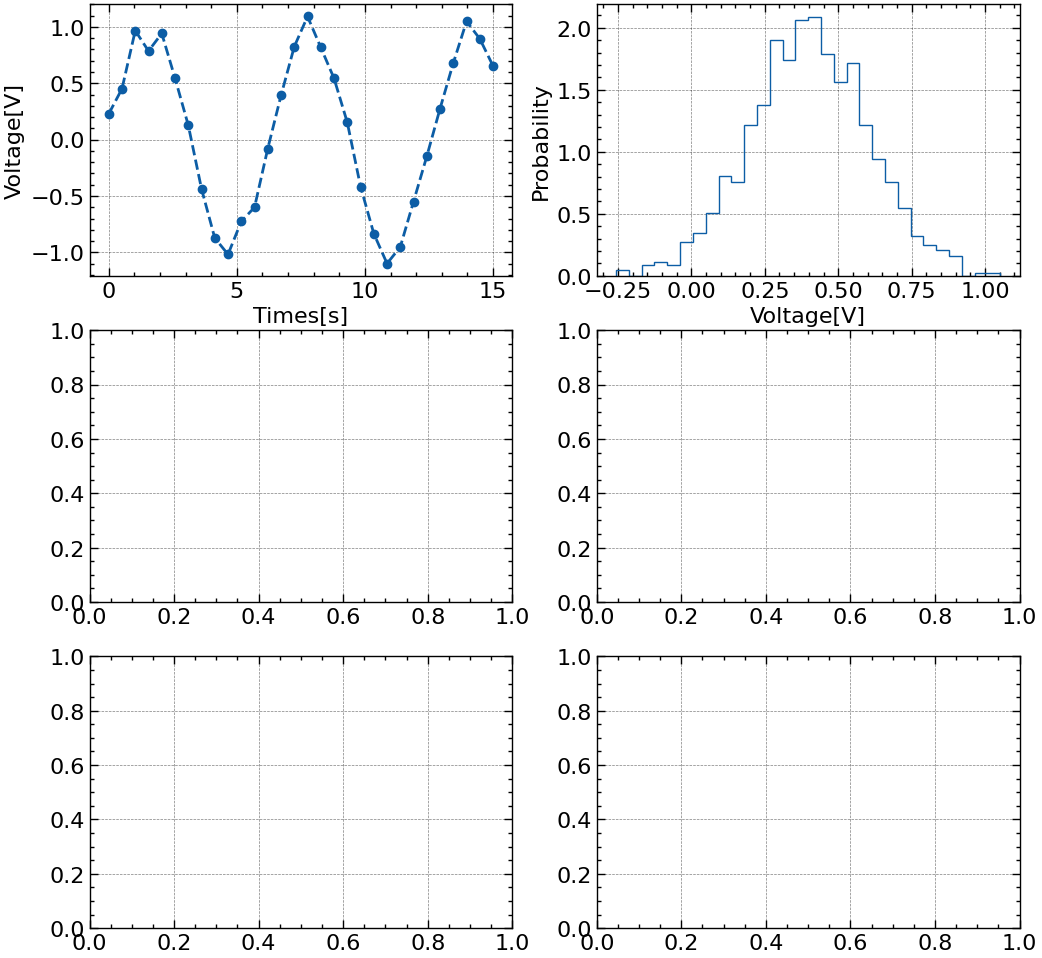

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
ax = axes[0][0]
ax.plot(x, y, 'o--')
ax.set_xlabel('Times[s]')
ax.set_ylabel('Voltage[V]')

ax = axes[0][1]
ax.hist(res, bins=30, density=True, histtype='step')
ax.set_xlabel('Voltage[V]')
ax.set_ylabel('Probability')
plt.show()

### Example

Creating the following plot

In [20]:
res_a1 = 0.2*np.random.randn(1000) + 0.4
res_b1 = 0.25*np.random.randn(1000) + 0.4
res_a2 = 0.21*np.random.randn(1000) + 0.3
res_b2 = 0.22*np.random.randn(1000) + 0.3

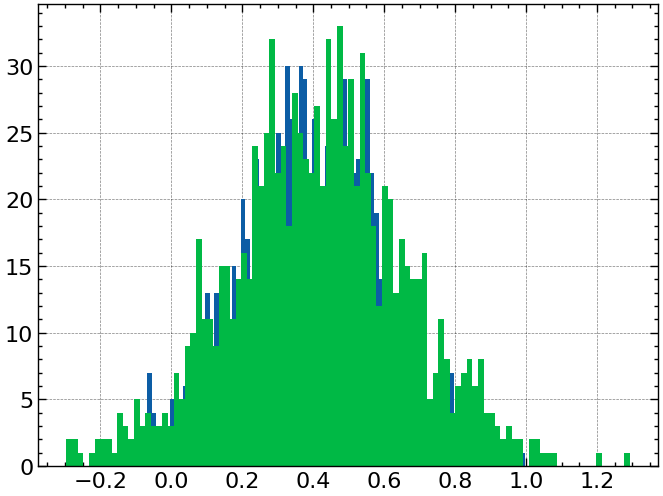

In [23]:
plt.hist(res_a1, bins=100)
plt.hist(res_b1, bins=100)
plt.show()

Good habit to come up with complicated strings beforehand

In [22]:
textstr1 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a1)),
    r'$\sigma_b=%.4f$' % (np.std(res_b1))))

textstr2 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a2)),
    r'$\sigma_b=%.4f$' % (np.std(res_b2))))

Make plot

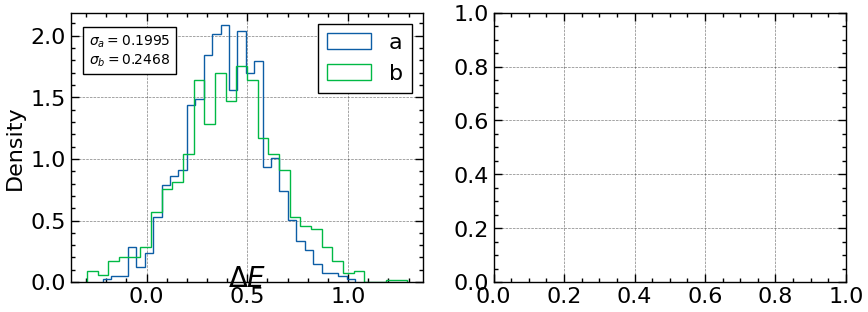

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))
ax = axes[0]
ax.hist(res_a1, bins=30, density=True, histtype='step', label='a')
ax.hist(res_b1, bins=30, density=True, histtype='step', label='b')
ax.legend(loc='upper right', fancybox=False, edgecolor='black')
ax.text(0.05, 0.81, textstr1, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylabel('Density')
ax.text(0.5, -0.04, '$\Delta E$', ha='center', fontsize=20)
plt.show()

### 2D Plots

Generate some data

In [40]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_, _)
z = x**2 + x*y

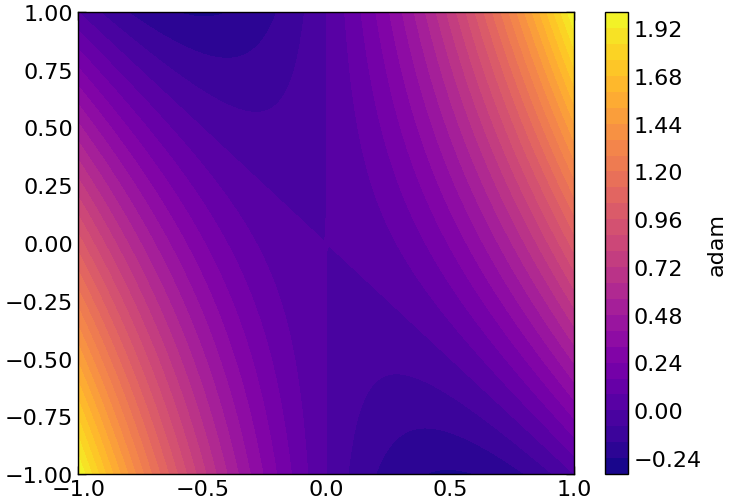

In [48]:
plt.contourf(x, y, z, levels=30, cmap='plasma')
plt.colorbar(label='adam')

Can make them more desne by changing levels and also can change colormap

Can use vmin and vmax to adjust the color range

### Contour plot

Sometimes, the following is prefared.

<a list of 28 text.Text objects>

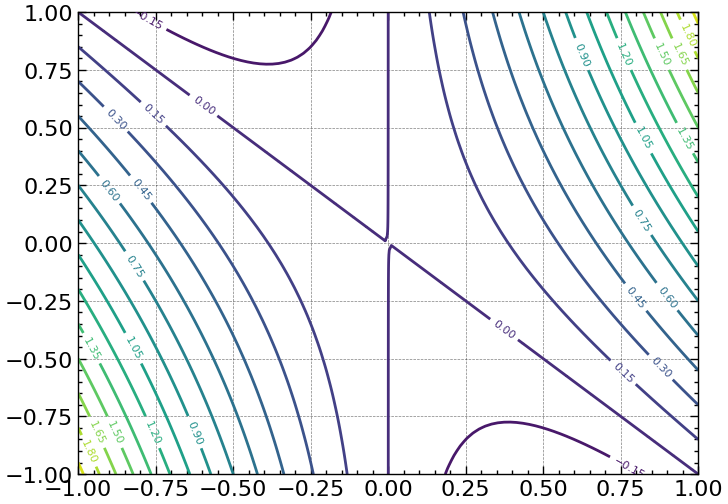

In [53]:
cs = plt.contour(x, y, z, levels=20)
plt.clabel(cs, fontsize=8)

### 3D surface plot

3D Surface Plot (Generally not preferred). However, they tend to work well in animations.

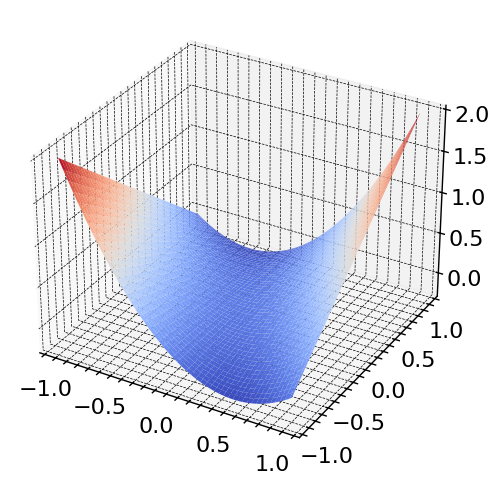

In [55]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(x, y, z, cmap='coolwarm')

### Streamplots

for plotting vector fields

In [56]:
w = 3
_ = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(_, _)
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

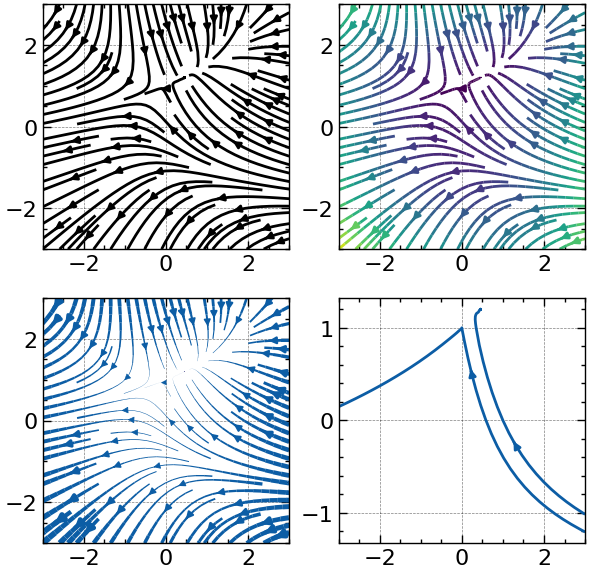

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
ax = axes[0][0]
ax.streamplot(X, Y, U, V, color='black')
ax = axes[0][1]
ax.streamplot(X, Y, U, V, color=speed)
ax = axes[1][0]
lw = 5*speed/speed.max()
ax.streamplot(X, Y, U, V, linewidth=lw)
ax = axes[1][1]
lw = 5*speed/speed.max()
seedpoints = np.array([[0, 1], [1, 0]])
ax.streamplot(X, Y, U, V, start_points=seedpoints)

### Image reading

In [64]:
# im = plt.imread('images/flower.png')

In [65]:
# plt.imshow(im)

### Animations

Animations require relating the time of your problem to the frame of the animation, then specifying the frames per second:
- Below is a sin wave moving at 3m/s. Translate this into an animation.

In [66]:
def f(x, t):
    return np.sin(x-3*t)

x = np.linspace(0, 10*np.pi, 1000)

Create animation

In [69]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

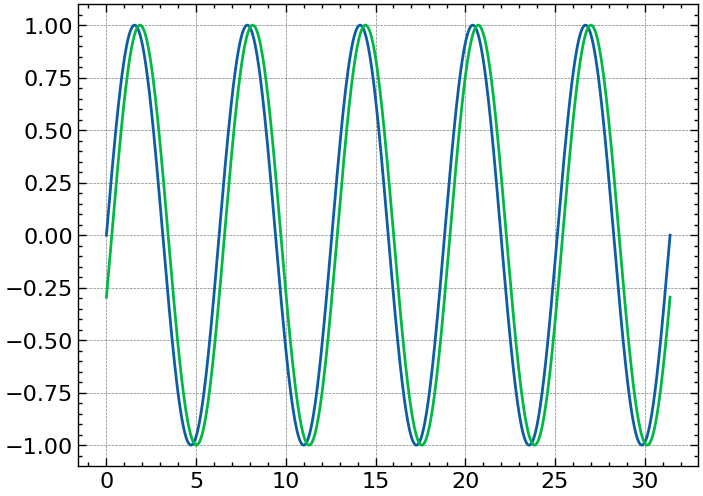

In [68]:
plt.plot(x, f(x, 0))
plt.plot(x, f(x, 0.1))

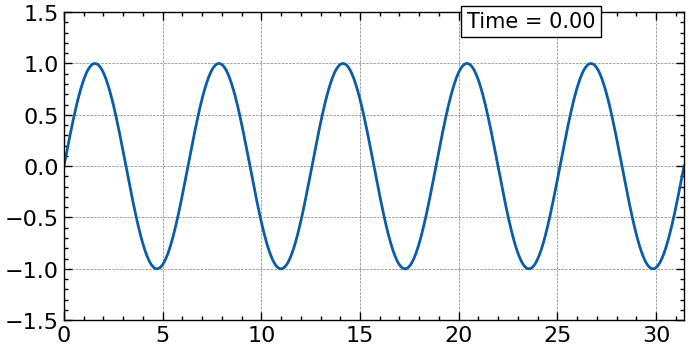

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ln1, = plt.plot([],[])
time_text = ax.text(0.65, 0.95, '', fontsize=15, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))
ax.set_xlim(0, 10*np.pi)
ax.set_ylim(-1.5, 1.5)

def animate(i):
    ln1.set_data(x, f(x, 1/50*i))
    time_text.set_text('Time = {:.2f}'.format(i/50))

ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)
ani.save('sine_wave.gif', writer='pillow', fps=50, dpi=100)

In [76]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_, _)
z = x**2 + x*y

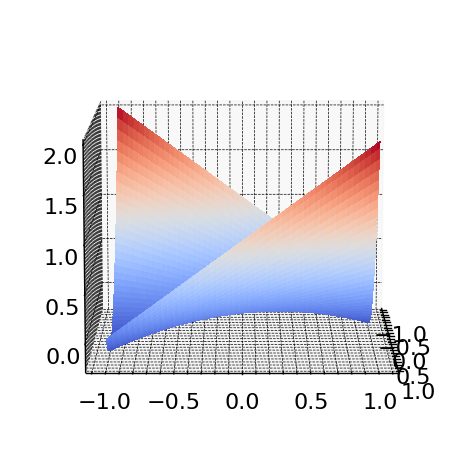

In [77]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(x, y, z, cmap='coolwarm', linewidth=0, antialiased=False)
ax.view_init(elev=10, azim=0)

def animate(i):
    ax.view_init(elev=10, azim=3*i)

ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
ani.save('sine_wave.gif', writer='pillow', fps=30, dpi=100)